# https://bob3rdnewbie.tistory.com/320

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import PIL
import matplotlib.pyplot as plt

In [2]:
class CNN_mnist(nn.Module):
    """
    Simple CNN NETWORK
    """

    def __init__(self):
        super(CNN_mnist, self).__init__()
        self.conv = nn.Sequential(
            # 3 x 128 x 128
            nn.Conv2d(1, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),

            # 32 x 128 x 128
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),

            # 64 x 128 x 128
            nn.MaxPool2d(2, 2),

            # 64 x 64 x 64
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),

            # 128 x 64 x 64
            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),

            # 256 x 64 x 64
            nn.MaxPool2d(2, 2),

            # 256 x 32 x 32
            nn.Conv2d(256, 10, 3, 1, 1),
            nn.BatchNorm2d(10),
            nn.LeakyReLU(0.2)
        )

        # 256 x 32 x 32
        self.avg_pool = nn.AvgPool2d(7)
        # 256 x 1 x 1
        self.classifier = nn.Linear(10, 10)
        self.name='CNN_mnist'

    def forward(self, x):
        features = self.conv(x)
        flatten = self.avg_pool(features).view(features.size(0), -1)
        output = self.classifier(flatten)
        return output, features


In [3]:
net = CNN_mnist()
net.load_state_dict(torch.load("/home/jake/Gits/AI college/XAI/2.problem/model_weights/pth/cnn_mnist.pth"))
print(net)

CNN_mnist(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.2)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): LeakyReLU(negative_slope=0.2)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

# 정방향 역방향 훅 

In [4]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from PIL import Image
import cv2
transform = transforms.Compose([
    #transforms.Resize(32),
    transforms.ToTensor(),
])

In [5]:
train = torchvision.datasets.MNIST(root='/mnt/3CE35B99003D727B/input/pytorch/data', train=True,
                                                download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train, batch_size=1, shuffle=False)

In [6]:
def train(epoch,trainloader,step):
    #print("training....")

    for i , (images, targets) in enumerate(trainloader):
        #print(images.shape)
        self.net.train()

        images, targets = images.to(self.device), targets.to(self.device)
        self.optimizer.zero_grad()
        if self.net.name =='CNN_mnist':
            outputs ,_ = self.net(images)
        else:
             outputs= self.net(images)
        loss = self.criterion(outputs,targets)
        loss.backward()
        self.optimizer.step()

        self.epoch_loss += loss.item()
        _, predicted = outputs.max(1)
        self.total += targets.size(0)
        self.correct += predicted.eq(targets).sum().item()

        if (i + 1) % 10000 == 0:
            print('Epoch [%d/%d], Iter [%d/%d], Loss: %.4f  correct: %.4f %%'
                  % (epoch + 1, 10, i + 1, len(trainloader), loss.item(),100.*self.correct/self.total))

    avg_epoch_loss = self.epoch_loss / len(trainloader)

    print("Epoch: %d, Avg Loss: %.4f" % (epoch + 1, avg_epoch_loss))


In [7]:
train_loader.dataset.data.shape

torch.Size([60000, 28, 28])

In [8]:
input = np.random.rand(32,1,28,28)
input = torch.tensor(input)

In [9]:
def printnorm(input,output):
    #print('inside' + self.__class__.name__+ 'forward')
    print('')
    print('input:', type(input))
    print('input[0]', type(input[0]))
    print('output:',type(output))
    print('')
    print('input size', input[0].size())
    print('output size',output.data.size())
    print('output norm',output.data.norm())

In [10]:
#net.conv.register_forward_hook(printnorm)

In [11]:
net.cuda()

CNN_mnist(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.2)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): LeakyReLU(negative_slope=0.2)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [12]:
#feature_blobs = []
#net._modules.get(final_conv).register_forward_hook(hook_feature)

In [13]:
#print('feature_blobs->',torch.tensor(feature_blobs).shape)

In [53]:
def returnCAM(feature_conv, weight_softmax, class_idx):
    # generate the class activation maps upsample to 256x256
    size_upsample = (28, 28)
    bz, nc, h, w = feature_conv.shape
    output_cam = []
    print('class_idx->',class_idx)
    for idx in class_idx:
        cam = weight_softmax[class_idx].dot(feature_conv.reshape((nc, h * w)))
        cam = cam.reshape(h, w)
        cam = cam - np.min(cam)
        cam_img = cam / np.max(cam)
        cam_img = np.uint8(255 * cam_img)
        output_cam.append(cv2.resize(cam_img, size_upsample))
    return output_cam

In [54]:
device='cuda'
final_conv = 'conv'
feature_blobs = []

params = list(net.parameters())

#print('params->',params[-2])

weight_softmax = np.squeeze(params[-2].cpu().data.numpy())

print('weight_softmax->',weight_softmax.shape)
result
def hook_feature(module, input, output):
    feature_blobs.append(output.cpu().data.numpy())

for i , (img, targets) in enumerate(train_loader):
    print(i,img.shape)
    net._modules.get(final_conv).register_forward_hook(hook_feature)
    img, targets = img.to(device), targets.to(device)
    logit ,_ = net(images)
    
    x = img[0, :, :].cpu().data.numpy().squeeze()
    #feature_blobs.append(outputs.cpu().data.numpy())
    print('feature_blobs->',torch.tensor(feature_blobs).shape)
    
    #print('logit->',logit)
    h_x = F.softmax(logit,dim=1).data.squeeze()
    #print('h_x->',h_x)
    
    weight_softmaxtemp = weight_softmax
    feature_blobstemp = feature_blobs[0]
    print('feature_blobstemp->',feature_blobstemp.shape)
    
    probs, idx = h_x.sort(0, True)
    #print('probs->',probs,'idx->',idx)
    print('idx[0].item()->',[idx[0].item()])
    
    CAMs = returnCAM(feature_blobs[0], weight_softmax, [idx[0].item()])
    
    height, width = img.shape[2:]

    CAM = cv2.resize(CAMs[0], (width, height))
    heatmap = cv2.applyColorMap(CAM, cv2.COLORMAP_JET)
    result = (x * CAM)

    
    if i==0:break

weight_softmax-> (10, 10)
0 torch.Size([1, 1, 28, 28])
feature_blobs-> torch.Size([25, 1, 10, 7, 7])
feature_blobstemp-> (1, 10, 7, 7)
idx[0].item()-> [7]
class_idx-> [7]


In [46]:
result.shape
img = result

torch.Size([28, 28])


/home/jake/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


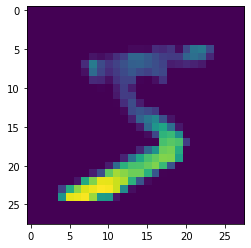

In [44]:
img = img.squeeze()
img = torch.tensor(img)
print(img.shape)
#img = (img).permute(1, 2, 0)
plt.imshow(img)
plt.show()